# Finding best model with Gaussian Process Regression (GPR)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
# import own modules
import run_gpr
from gpr_alg import plot_data, prepare_data

# import external modules
import warnings
import pandas as pd
import numpy as np
import sklearn.gaussian_process as gp

## Find best model

We start be performing a grid search to find the best model for the given dataset. The ouput is saved in a file.

In [4]:
# Load statistics from model fitting with different kernels
model_stats = pd.read_pickle('output/data/grid_search_stats_1D_100_iterations.pkl')

model_stats

,kernel,stats,pred_mean,pred_cov
0,RBF: {'length_scale': 9.999999999999997e-06},0.614291,"[0.0, 0.0, 0.0, 1.4504751023330793, 1.39462576...","[1.0, 1.0, 1.0, 0.0005477224750655972, 0.00054..."
6,RationalQuadratic: {'length_scale': 0.19167268...,0.000136,"[1.526488006988842, 1.516771602694746, 1.49142...","[0.0036120387139064922, 0.0021214515416009172,..."
7,RationalQuadratic: {'length_scale': 0.19164242...,0.000136,"[1.5264891894993582, 1.5167720058653629, 1.491...","[0.003612840909905975, 0.0021217711745166712, ..."
8,RationalQuadratic: {'length_scale': 0.19164271...,0.000136,"[1.5264891744609201, 1.5167719976248009, 1.491...","[0.0036128266257824584, 0.002121745975996277, ..."
9,RationalQuadratic: {'length_scale': 0.19164322...,0.000136,"[1.5264891215487069, 1.5167719776156332, 1.491...","[0.0036127883969509574, 0.0021217226873560162,..."
10,RationalQuadratic: {'length_scale': 0.19164299...,0.000136,"[1.5264891521616732, 1.516771987902672, 1.4914...","[0.003612807896220834, 0.0021217447254065075, ..."
11,RationalQuadratic: {'length_scale': 0.19163574...,0.000136,"[1.5264894503928872, 1.516772086235676, 1.4914...","[0.003613034624728592, 0.002121815760745965, 0..."
13,ExpSineSquared: {'length_scale': 1.20412509935...,0.000136,"[1.526488939579906, 1.5167719011355132, 1.4914...","[0.003612743938598867, 0.0021217146087060637, ..."
14,ExpSineSquared: {'length_scale': 1.20412525123...,0.000136,"[1.5264889386184564, 1.5167719008029508, 1.491...","[0.003612743296449222, 0.0021217143600234553, ..."
15,ExpSineSquared: {'length_scale': 1.20412526380...,0.000136,"[1.5264889385381366, 1.5167719007748985, 1.491...","[0.0036127432426704127, 0.0021217143389357968,..."


In [5]:
# Sort dataframe
model_stats = model_stats.sort_values(by=['stats'])
model_stats

,kernel,stats,pred_mean,pred_cov
11,RationalQuadratic: {'length_scale': 0.19163574...,0.000136,"[1.5264894503928872, 1.516772086235676, 1.4914...","[0.003613034624728592, 0.002121815760745965, 0..."
8,RationalQuadratic: {'length_scale': 0.19164271...,0.000136,"[1.5264891744609201, 1.5167719976248009, 1.491...","[0.0036128266257824584, 0.002121745975996277, ..."
7,RationalQuadratic: {'length_scale': 0.19164242...,0.000136,"[1.5264891894993582, 1.5167720058653629, 1.491...","[0.003612840909905975, 0.0021217711745166712, ..."
9,RationalQuadratic: {'length_scale': 0.19164322...,0.000136,"[1.5264891215487069, 1.5167719776156332, 1.491...","[0.0036127883969509574, 0.0021217226873560162,..."
10,RationalQuadratic: {'length_scale': 0.19164299...,0.000136,"[1.5264891521616732, 1.516771987902672, 1.4914...","[0.003612807896220834, 0.0021217447254065075, ..."
13,ExpSineSquared: {'length_scale': 1.20412509935...,0.000136,"[1.526488939579906, 1.5167719011355132, 1.4914...","[0.003612743938598867, 0.0021217146087060637, ..."
17,ExpSineSquared: {'length_scale': 1.20412519355...,0.000136,"[1.5264889389844711, 1.5167719009295695, 1.491...","[0.0036127435411120604, 0.0021217144549964067,..."
14,ExpSineSquared: {'length_scale': 1.20412525123...,0.000136,"[1.5264889386184564, 1.5167719008029508, 1.491...","[0.003612743296449222, 0.0021217143600234553, ..."
15,ExpSineSquared: {'length_scale': 1.20412526380...,0.000136,"[1.5264889385381366, 1.5167719007748985, 1.491...","[0.0036127432426704127, 0.0021217143389357968,..."
16,ExpSineSquared: {'length_scale': 1.20412528161...,0.000136,"[1.526488938426553, 1.516771900736643, 1.49142...","[0.0036127431682098097, 0.0021217143104439104,..."


In [6]:
for row in range(model_stats.shape[0]):
    print(model_stats['kernel'].iloc[row])

RationalQuadratic: {'length_scale': 0.19163574112997428, 'alpha': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.19164271710011851, 'alpha': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.19164242455130298, 'alpha': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.19164322017136112, 'alpha': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.19164299772876425, 'alpha': 100000.00000000001}
ExpSineSquared: {'length_scale': 1.2041250993556953e-05, 'periodicity': 100000.00000000001}
ExpSineSquared: {'length_scale': 1.204125193551379e-05, 'periodicity': 100000.00000000001}
ExpSineSquared: {'length_scale': 1.2041252512336621e-05, 'periodicity': 100000.00000000001}
ExpSineSquared: {'length_scale': 1.2041252638012058e-05, 'periodicity': 100000.00000000001}
ExpSineSquared: {'length_scale': 1.2041252816104628e-05, 'periodicity': 100000.00000000001}
RationalQuadratic: {'length_scale': 0.1916726839093751, 'alpha': 100000.00000000001}
RationalQuadratic + WhiteK

We discard all but option 5 because for all other kernels at least one parameter is very close to the specified bounds. Moreover, with the fith kernel the mean absolut error is still extremly low.

In [7]:
# Get model with smallest mean absolut error
mean_prediction =  model_stats['pred_mean'].iloc[4]
std_prediction = model_stats['pred_cov'].iloc[4]

print('Kernel: ' + str(model_stats['kernel'].iloc[4]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[4]))

Kernel: RationalQuadratic: {'length_scale': 0.19164299772876425, 'alpha': 100000.00000000001}
Mean absolut error: 0.0001360682640223963


In [8]:
# Make grid
grid = prepare_data.create_1D_grid(step_size=0.01)
# Create data
data = prepare_data.create_data(func_param=[1, grid], func_name='zhouetal')
# Scale data (i.e. normalize)
data_scaled, _ = prepare_data.rescale_data(data, type='standardization')
# Split data into test and training datasets
grid_train, grid_test, data_train, data_test = prepare_data.split_train_test_data(grid, data_scaled, train_perc=0.3)

<IPython.core.display.Javascript object>


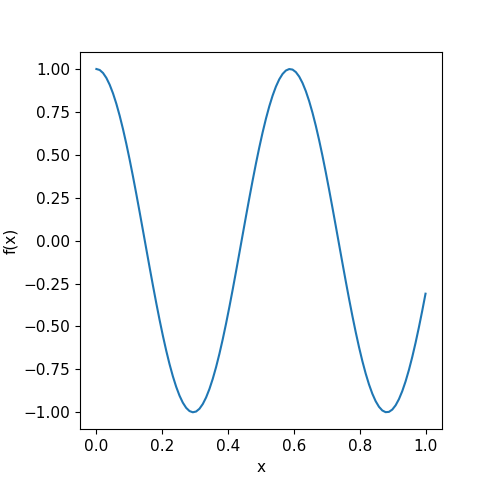

In [9]:
# Plot original data
plot_data.make_2D_plot(data, grid, y_label='f(x)')

<IPython.core.display.Javascript object>


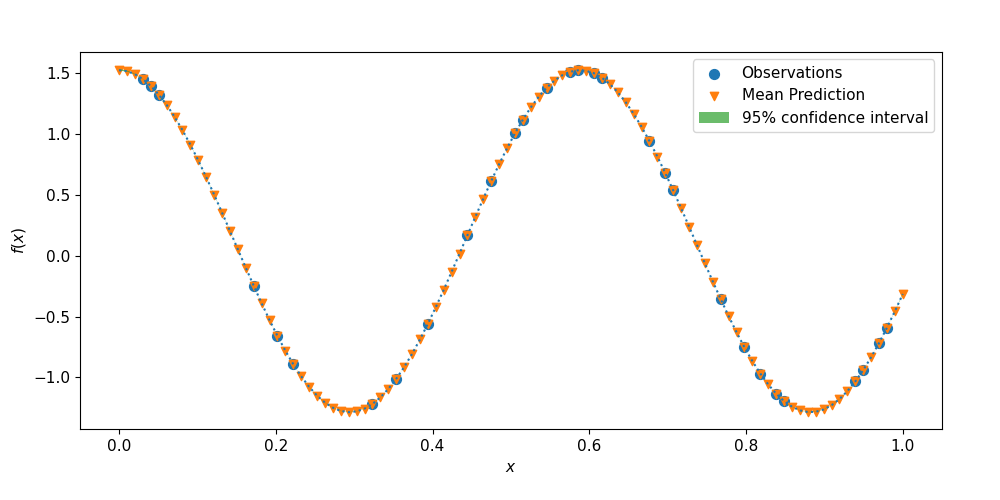

In [10]:
# Plot fitted data
plot_data.make_2D_conf_interval_plot(grid_values=grid, obs_values=data_scaled, grid_values_train=grid_train,
                                             obs_values_train=data_train, mean_pred=mean_prediction.flatten(),
                                             std_pred=std_prediction.flatten())

<IPython.core.display.Javascript object>


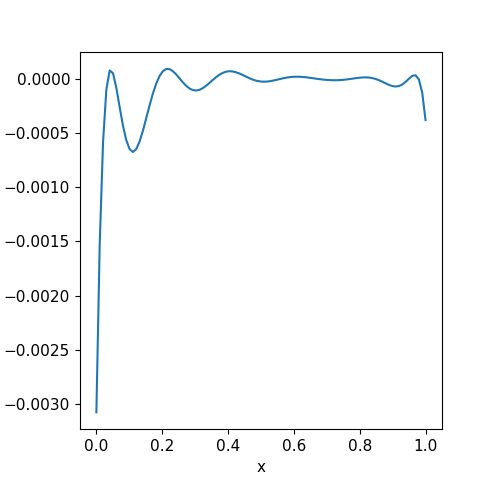

In [11]:
error = data_scaled.flatten() - mean_prediction.flatten()
# Plot error
plot_data.make_2D_plot(error, grid, y_label='error')

## Fit specific model